In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
data=pd.read_csv('Admission_Predict.csv',index_col='Serial No.')

In [3]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [126]:
data=data.rename(columns={'GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'Rating','Chance of Admit ':'Chance'})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
GRE         400 non-null int64
TOEFL       400 non-null int64
Rating      400 non-null int64
SOP         400 non-null float64
LOR         400 non-null float64
CGPA        400 non-null float64
Research    400 non-null int64
Chance      400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [7]:
data.shape

(400, 8)

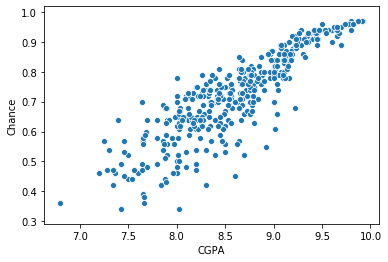

In [8]:
sns.scatterplot(x=data['CGPA'],y=data['Chance'])

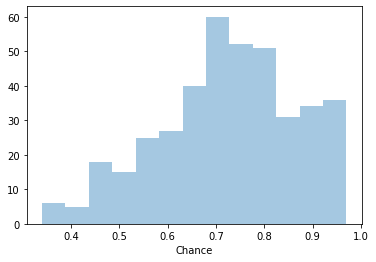

In [9]:
sns.distplot(data['Chance'],kde=False)

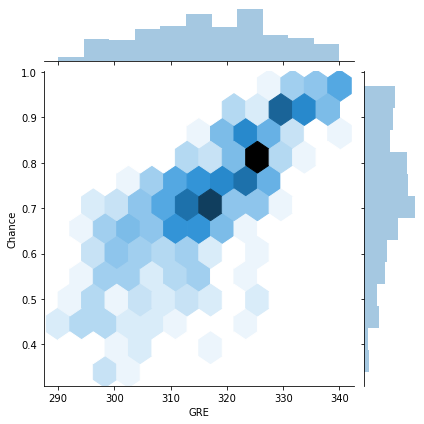

In [10]:
sns.jointplot(data=data,x=data['GRE'],y=data['Chance'],kind='hex')

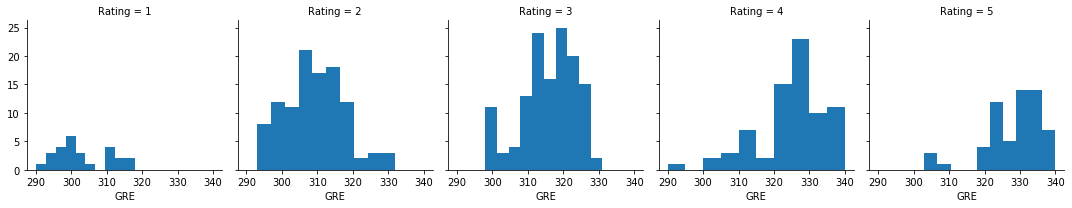

In [11]:
g=sns.FacetGrid(data=data,col='Rating')
g.map(plt.hist,'GRE')

In [12]:
data.groupby(['Rating']).mean()

,GRE,TOEFL,SOP,LOR,CGPA,Research,Chance
Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


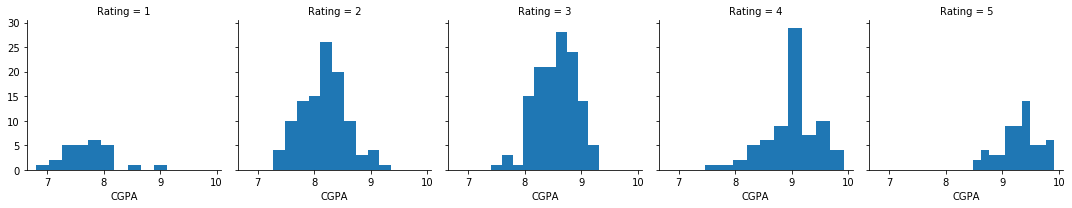

In [31]:
g=sns.FacetGrid(data=data,col='Rating')
g.map(plt.hist,'CGPA')

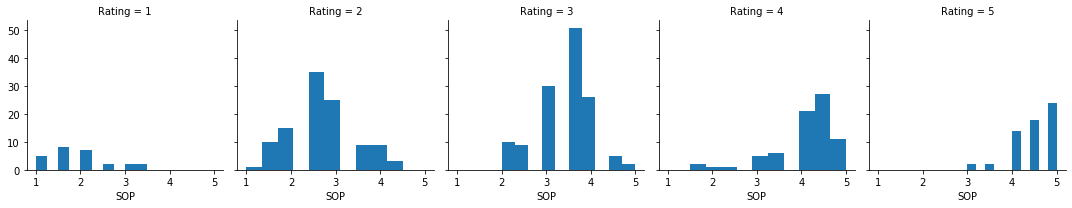

In [13]:
g=sns.FacetGrid(data=data,col='Rating')
g.map(plt.hist,'SOP')

In [34]:
data['CGPA'].min()

6.8

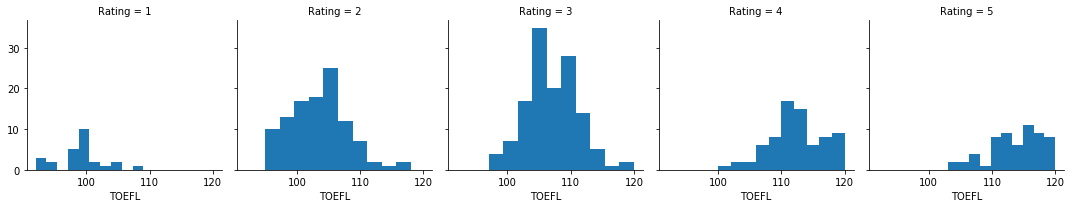

In [14]:
g=sns.FacetGrid(data=data,col='Rating')
g.map(plt.hist,'TOEFL')

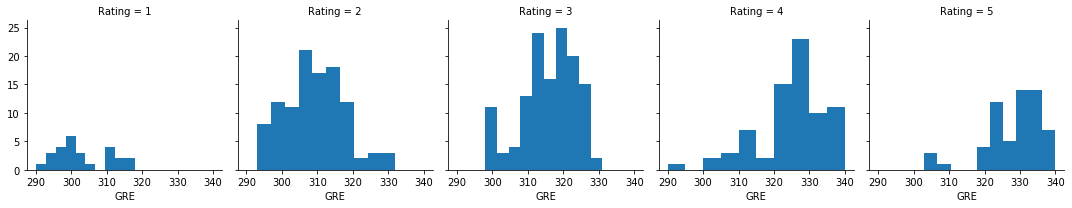

In [15]:
g=sns.FacetGrid(data=data,col='Rating')
g.map(plt.hist,'GRE')

In [72]:
df=data.loc[data['Rating']==1,['GRE','Chance']]

In [90]:
df.loc[df['Chance']>0.6,'Chance']=1
df.loc[df['Chance']<0.6,'Chance']=0
df['Chance']=df['Chance'].astype(int)

,Chance
GREBand,
"(289.972, 299.333]",0.000
"(299.333, 308.667]",0.125
"(308.667, 318.0]",0.375


In [97]:
df['GREBand']=pd.cut(df['GRE'],3)
df[['GREBand','Chance']].groupby('GREBand').mean()

,Chance
GREBand,
"(289.972, 299.333]",0.000
"(299.333, 308.667]",0.125
"(308.667, 318.0]",0.375


In [98]:
df=data.loc[data['Rating']==2,['GRE','Chance']]

In [99]:
df.loc[df['Chance']>0.6,'Chance']=1
df.loc[df['Chance']<0.6,'Chance']=0
df['Chance']=df['Chance'].astype(int)

In [103]:
df['GREBand']=pd.cut(df['GRE'],4)
df[['GREBand','Chance']].groupby('GREBand').mean()

,Chance
GREBand,
"(292.961, 302.75]",0.320000
"(302.75, 312.5]",0.727273
"(312.5, 322.25]",0.812500
"(322.25, 332.0]",1.000000


In [104]:
df=data.loc[data['Rating']==3,['GRE','Chance']]

In [105]:
df.loc[df['Chance']>0.6,'Chance']=1
df.loc[df['Chance']<0.6,'Chance']=0
df['Chance']=df['Chance'].astype(int)

In [106]:
df['GREBand']=pd.cut(df['GRE'],4)
df[['GREBand','Chance']].groupby('GREBand').mean()

,Chance
GREBand,
"(297.967, 306.25]",0.800000
"(306.25, 314.5]",0.850000
"(314.5, 322.75]",1.000000
"(322.75, 331.0]",0.903226


In [108]:
df=data.loc[data['Rating']==4,['GRE','Chance']]

In [109]:
df.loc[df['Chance']>0.6,'Chance']=1
df.loc[df['Chance']<0.6,'Chance']=0
df['Chance']=df['Chance'].astype(int)

In [110]:
df['GREBand']=pd.cut(df['GRE'],4)
df[['GREBand','Chance']].groupby('GREBand').mean()

,Chance
GREBand,
"(289.95, 302.5]",0.000000
"(302.5, 315.0]",0.818182
"(315.0, 327.5]",0.967742
"(327.5, 340.0]",1.000000


In [23]:
df=data.loc[data['Rating']==5,['GRE','Chance']]
df['GRE']

Serial No.
6      330
23     328
24     334
25     336
26     340
27     322
34     340
35     331
36     320
45     326
46     322
47     329
48     339
71     332
72     336
73     321
83     320
84     322
85     340
109    331
110    304
111    305
120    327
121    335
122    334
130    333
131    339
132    303
133    309
134    323
135    333
143    331
152    332
153    321
166    322
172    334
188    335
189    331
190    324
191    324
192    323
193    322
194    336
203    340
204    334
214    333
216    330
235    330
236    326
238    329
261    327
277    329
286    331
287    336
288    324
338    332
339    323
340    324
363    338
386    335
Name: GRE, dtype: int64

In [112]:
df.loc[df['Chance']>0.6,'Chance']=1
df.loc[df['Chance']<0.6,'Chance']=0
df['Chance']=df['Chance'].astype(int)

In [119]:
df['GREBand']=pd.cut(df['GRE'],4)
df[['GREBand','Chance']].groupby('GREBand').mean()

,Chance
GREBand,
"(302.963, 312.25]",1
"(312.25, 321.5]",1
"(321.5, 330.75]",1
"(330.75, 340.0]",1


In [120]:
data.loc[data['Rating']==5,'Chance']

Serial No.
6      0.90
23     0.94
24     0.95
25     0.97
26     0.94
27     0.76
34     0.90
35     0.94
36     0.88
45     0.91
46     0.88
47     0.86
48     0.89
71     0.94
72     0.96
73     0.93
83     0.92
84     0.92
85     0.94
109    0.93
110    0.68
111    0.61
120    0.71
121    0.94
122    0.94
130    0.92
131    0.96
132    0.77
133    0.71
134    0.79
135    0.89
143    0.92
152    0.94
153    0.86
166    0.78
172    0.89
188    0.93
189    0.93
190    0.88
191    0.90
192    0.87
193    0.86
194    0.94
203    0.97
204    0.97
214    0.96
216    0.93
235    0.91
236    0.88
238    0.86
261    0.87
277    0.89
286    0.93
287    0.92
288    0.89
338    0.94
339    0.81
340    0.81
363    0.91
386    0.96
Name: Chance, dtype: float64

In [27]:
data['GREBand']=pd.qcut(data['GRE'],5)
data[['GREBand','Chance']].groupby(['GREBand']).mean()

,Chance
GREBand,
"(289.999, 306.0]",0.567317
"(306.0, 314.0]",0.672135
"(314.0, 321.0]",0.720000
"(321.0, 327.0]",0.785570
"(327.0, 340.0]",0.907887


In [18]:
#Analyzing cut

In [22]:
data['GREBand1']=pd.cut(data['GRE'],5)
data[['GREBand1','Chance']].groupby(['GREBand1']).mean()

,Chance
GREBand1,
"(289.95, 300.0]",0.535000
"(300.0, 310.0]",0.624384
"(310.0, 320.0]",0.693770
"(320.0, 330.0]",0.801858
"(330.0, 340.0]",0.928800


In [30]:
data.columns

Index(['GRE', 'TOEFL', 'Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance',
       'GREBand'],
      dtype='object')

In [29]:
data=data.drop(['GREBand1'],axis=1)

/home/harsh/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


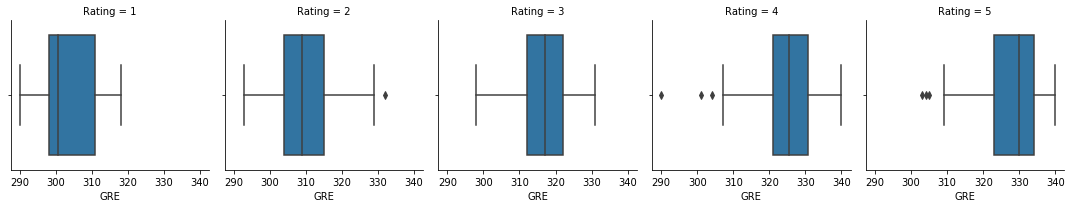

In [31]:
g=sns.FacetGrid(data=data,col='Rating')
g.map(sns.boxplot,'GRE')

In [127]:
x1=data.loc[data['Rating']==2,'GRE'].mode()[0]
data.loc[(data['Rating']==2) & (data['GRE']>330),'GRE']=x1

In [128]:
x1=data.loc[data['Rating']==4,'GRE'].mode()[0]
data.loc[(data['Rating']==4) & (data['GRE']<310),'GRE']=x1

In [129]:
x1=data.loc[data['Rating']==5,'GRE'].mode()[0]
data.loc[(data['Rating']==5) & (data['GRE']<310),'GRE']=x1

/home/harsh/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


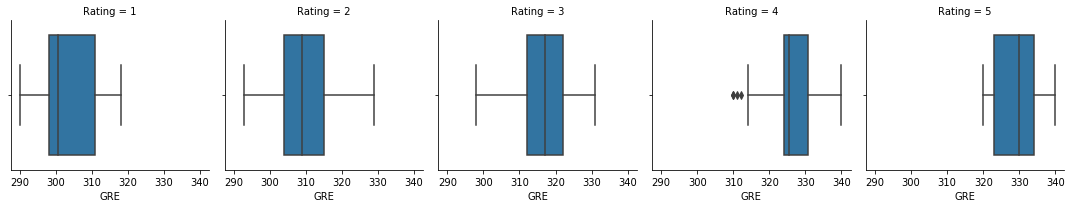

In [48]:
g=sns.FacetGrid(data=data,col='Rating')
g.map(sns.boxplot,'GRE')

In [49]:
data.loc[data['Rating']==4,'GRE'].mode()[0]

324

In [50]:
data[['GREBand','Chance']].groupby(['GREBand']).mean()

,Chance
GREBand,
"(289.999, 306.0]",0.567317
"(306.0, 314.0]",0.672135
"(314.0, 321.0]",0.720000
"(321.0, 327.0]",0.785570
"(327.0, 340.0]",0.907887


In [130]:
data.loc[(data['GRE']>289)&(data['GRE']<=306),'GRE']=0
data.loc[(data['GRE']>306)&(data['GRE']<=314),'GRE']=1
data.loc[(data['GRE']>314)&(data['GRE']<=321),'GRE']=2
data.loc[(data['GRE']>321)&(data['GRE']<=327),'GRE']=3
data.loc[(data['GRE']>317)&(data['GRE']<=340),'GRE']=4
data['GRE']=data['GRE'].astype(int)

In [53]:
data=data.drop(['GREBand'],axis=1)

In [62]:
data.GRE.value_counts()

1    89
0    82
3    79
2    79
4    71
Name: GRE, dtype: int64

In [103]:
data

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Chance
Serial No.,,,,,,,,
1,4,118,4,4.5,4.5,9.65,1,0.92
2,3,107,4,4.0,4.5,8.87,1,0.76
3,2,104,3,3.0,3.5,8.00,1,0.72
4,3,110,3,3.5,2.5,8.67,1,0.80
5,1,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,3,110,3,3.5,3.5,9.04,1,0.82
397,3,107,3,3.0,3.5,9.11,1,0.84
398,4,116,4,5.0,4.5,9.45,1,0.91


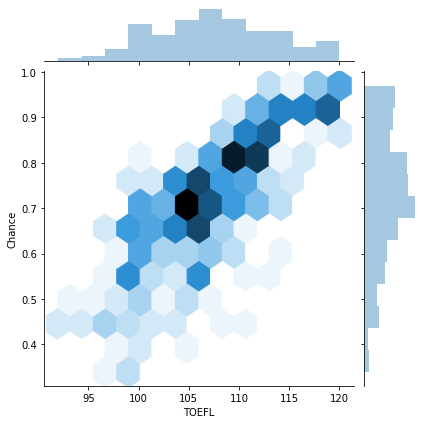

In [82]:
sns.jointplot(x=data['TOEFL'],y=data['Chance'],data=data.query('TOEFL<100'),kind='hex')

In [73]:
data['TOEFL'].mode()

0    110
dtype: int64

/home/harsh/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


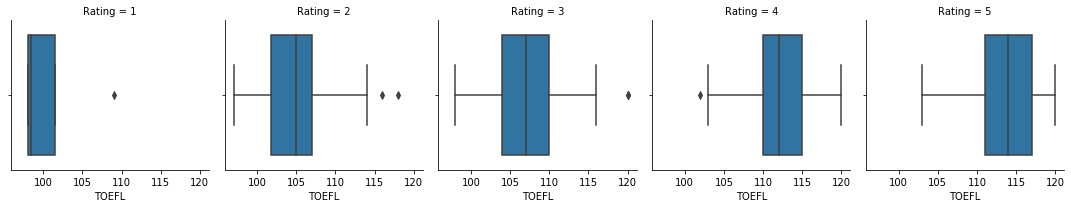

In [101]:
df=data.loc[data['Chance']>0.6]
g=sns.FacetGrid(data=df,col='Rating')
g.map(sns.boxplot,'TOEFL')

In [77]:
data['TOEFL'].value_counts().sort_index()


92      1
93      2
94      1
95      2
96      4
97      6
98      9
99     18
100    19
101    11
102    17
103    16
104    25
105    28
106    24
107    26
108    17
109    17
110    37
111    17
112    21
113    14
114    15
115     9
116    11
117     7
118     9
119     9
120     8
Name: TOEFL, dtype: int64

In [100]:
df=data.loc[data['TOEFL']<100,['TOEFL','Chance']]
df=df.loc[df['Chance']>=0.5]
df

,TOEFL,Chance
Serial No.,,
30,99,0.54
31,97,0.65
51,98,0.76
78,99,0.64
162,99,0.53
169,97,0.64
170,99,0.65
206,99,0.57
207,99,0.63


In [102]:
#While using the BoxPLot add one more constraint. Do this
#df=data.loc[data['Chance']>0.6]
#g=sns.FacetGrid(data=df,col='Rating')
#g.map(sns.boxplot,'TOEFL')

In [108]:
data['TOEFLBand']=pd.qcut(data['TOEFL'],5)
data[['Chance','TOEFLBand']].groupby('TOEFLBand').mean()

,Chance
TOEFLBand,
"(91.999, 102.0]",0.576556
"(102.0, 106.0]",0.669570
"(106.0, 109.0]",0.720833
"(109.0, 113.0]",0.802584
"(113.0, 120.0]",0.895588


In [131]:
data.loc[(data['TOEFL']>=92)&(data['TOEFL']<=102),'TOEFL']=0
data.loc[(data['TOEFL']>102)&(data['TOEFL']<=106),'TOEFL']=1
data.loc[(data['TOEFL']>106)&(data['TOEFL']<=109),'TOEFL']=2
data.loc[(data['TOEFL']>109)&(data['TOEFL']<=113),'TOEFL']=3
data.loc[(data['TOEFL']>113)&(data['TOEFL']<=120),'TOEFL']=4
data['TOEFL']=data['TOEFL'].astype(int)

In [112]:
data.TOEFL.value_counts().sort_index()

0    90
1    93
2    60
3    89
4    68
Name: TOEFL, dtype: int64

In [114]:
data=data.drop(['TOEFLBand'],axis=1)

In [132]:
data

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Chance
Serial No.,,,,,,,,
1,4,4,4,4.5,4.5,9.65,1,0.92
2,3,2,4,4.0,4.5,8.87,1,0.76
3,2,1,3,3.0,3.5,8.00,1,0.72
4,3,3,3,3.5,2.5,8.67,1,0.80
5,1,1,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,3,3,3,3.5,3.5,9.04,1,0.82
397,3,2,3,3.0,3.5,9.11,1,0.84
398,4,4,4,5.0,4.5,9.45,1,0.91


/home/harsh/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


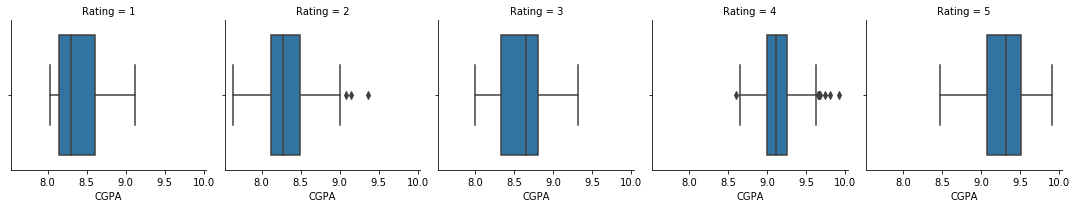

In [136]:
df=data.loc[data['Chance']>0.6]
g=sns.FacetGrid(data=df,col='Rating')
g.map(sns.boxplot,'CGPA')

In [134]:
x1=data.loc[data['Rating']==4,'CGPA'].mode()[0]
data.loc[(data['Rating']==4)&(data['CGPA']<8.5),'CGPA']=x1

In [135]:
x1=data.loc[data['Rating']==3,'CGPA'].mode()[0]
data.loc[(data['Rating']==3)&(data['CGPA']<8.0),'CGPA']=x1
#x1.min()

In [137]:
data['CGPABand']=pd.qcut(data['CGPA'],5)
data[['CGPABand','Chance']].groupby(['CGPABand']).mean()

,Chance
CGPABand,
"(6.7989999999999995, 8.1]",0.551585
"(8.1, 8.466]",0.671667
"(8.466, 8.78]",0.715976
"(8.78, 9.13]",0.779747
"(9.13, 9.92]",0.908987


In [138]:
data.loc[(data['CGPA']>=6.7989999999999995)&(data['CGPA']<=8.1),'CGPA']=0
data.loc[(data['CGPA']>8.1)&(data['CGPA']<=8.466),'CGPA']=1
data.loc[(data['CGPA']>8.466)&(data['CGPA']<=8.78),'CGPA']=2
data.loc[(data['CGPA']>8.78)&(data['CGPA']<=9.13),'CGPA']=3
data.loc[(data['CGPA']>9.13)&(data['CGPA']<=9.92),'CGPA']=4
data['CGPA']=data['CGPA'].astype(int)

In [141]:
data=data.drop(['CGPABand'],axis=1)

In [143]:
#MODELLING

In [144]:
X=data.drop(['Chance'],axis=1)
y=data['Chance']

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

In [154]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('The mean squared error when Random Forest is used is:-')
print((mean_squared_error(y_test, predictions)))

The mean squared error when Random Forest is used is:-
0.006463079838833952


In [155]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('The mean squared error when Decision Tree is used is:-')
print((mean_squared_error(y_test, predictions)))

The mean squared error when Decision Tree is used is:-
0.009465487499999998


In [156]:
print('Therefore, Random Forest should be considered')

Therefore, Random Forest should be considered
